<a href="https://colab.research.google.com/github/TusharKumarSin/tushar1/blob/main/Air_Quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import pandas as pd
import numpy as np

In [145]:
air_quality_data=pd.read_csv('/content/AP001.csv')

In [146]:
air_quality_data.tail()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
59145,2023-03-31 19:00:00,2023-03-31 20:00:00,53.00,70.25,11.03,61.15,41.52,8.30,3.68,1.16,...,30.57,72.75,0.45,310.0,10.75,NaN,-0.20,0.85,0.0,25.23
59146,2023-03-31 20:00:00,2023-03-31 21:00:00,58.50,88.50,9.22,52.23,35.27,7.45,3.02,1.07,...,30.65,78.50,0.35,NaN,11.00,NaN,-0.20,1.05,0.0,24.62
59147,2023-03-31 21:00:00,2023-03-31 22:00:00,44.25,80.50,3.40,34.95,21.35,7.25,1.62,0.85,...,30.68,82.50,0.35,37.0,11.00,NaN,-0.20,0.73,0.0,24.23
59148,2023-03-31 22:00:00,2023-03-31 23:00:00,31.25,59.00,3.45,27.48,17.40,7.50,1.82,0.83,...,30.60,86.00,0.30,NaN,11.00,NaN,-0.15,0.88,0.0,23.82
59149,2023-03-31 23:00:00,2023-04-01 00:00:00,26.00,53.00,3.33,24.07,15.50,7.70,1.83,0.81,...,30.67,87.00,0.33,NaN,11.00,NaN,-0.13,0.83,0.0,23.50


In [147]:
air_quality_data.isnull().sum()

From Date              0
To Date                0
PM2.5 (ug/m3)       4827
PM10 (ug/m3)        4700
NO (ug/m3)          3997
NO2 (ug/m3)         4050
NOx (ppb)           3835
NH3 (ug/m3)         5586
SO2 (ug/m3)         4865
CO (mg/m3)          4477
Ozone (ug/m3)       4583
Benzene (ug/m3)     3937
Toluene (ug/m3)     3937
Temp (degree C)     4037
RH (%)              3869
WS (m/s)            3851
WD (deg)            4494
SR (W/mt2)          4561
BP (mmHg)          57949
VWS (m/s)           3809
Xylene (ug/m3)      3950
RF (mm)             3865
AT (degree C)       4063
dtype: int64

In [148]:
numerical = air_quality_data.select_dtypes(include=['number'])
mean_values = numerical.mean()


In [149]:
air_quality_data=air_quality_data.fillna(mean_values)

In [150]:
air_quality_data.isnull().sum()

From Date          0
To Date            0
PM2.5 (ug/m3)      0
PM10 (ug/m3)       0
NO (ug/m3)         0
NO2 (ug/m3)        0
NOx (ppb)          0
NH3 (ug/m3)        0
SO2 (ug/m3)        0
CO (mg/m3)         0
Ozone (ug/m3)      0
Benzene (ug/m3)    0
Toluene (ug/m3)    0
Temp (degree C)    0
RH (%)             0
WS (m/s)           0
WD (deg)           0
SR (W/mt2)         0
BP (mmHg)          0
VWS (m/s)          0
Xylene (ug/m3)     0
RF (mm)            0
AT (degree C)      0
dtype: int64

In [151]:
air_quality_data.head()

,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),...,Temp (degree C),RH (%),WS (m/s),WD (deg),SR (W/mt2),BP (mmHg),VWS (m/s),Xylene (ug/m3),RF (mm),AT (degree C)
0,2016-07-01 10:00:00,2016-07-01 11:00:00,10.670000,39.000000,17.670000,39.200000,32.330000,7.070000,6.600000,0.480000,...,33.430000,71.67000,2.300000,226.33000,123.670000,755.713988,-0.100000,0.100000,0.000000,23.050000
1,2016-07-01 11:00:00,2016-07-01 12:00:00,2.000000,39.000000,20.500000,41.900000,35.800000,7.400000,5.782241,0.490000,...,33.700000,70.00000,2.500000,223.00000,186.000000,755.713988,-0.100000,0.100000,0.000000,22.279584
2,2016-07-01 12:00:00,2016-07-01 13:00:00,29.718423,58.531252,13.077963,39.195409,31.171453,10.057892,5.782241,0.634884,...,30.296565,71.96243,1.170445,180.16019,72.830661,755.713988,-0.015668,0.316406,0.052524,22.279584
3,2016-07-01 13:00:00,2016-07-01 14:00:00,29.718423,58.531252,13.077963,39.195409,31.171453,10.057892,5.782241,0.634884,...,30.296565,71.96243,1.170445,180.16019,72.830661,755.713988,-0.015668,0.316406,0.052524,22.279584
4,2016-07-01 14:00:00,2016-07-01 15:00:00,20.500000,50.000000,15.400000,43.600000,32.780000,6.350000,6.380000,0.470000,...,33.570000,63.50000,1.880000,223.00000,240.500000,755.713988,-0.100000,0.100000,0.000000,22.279584


In [152]:
date_info = pd.to_datetime(air_quality_data['From Date'], format='%Y-%m-%d %H:%M:%S')
print(date_info)


0       2016-07-01 10:00:00
1       2016-07-01 11:00:00
2       2016-07-01 12:00:00
3       2016-07-01 13:00:00
4       2016-07-01 14:00:00
                ...        
59145   2023-03-31 19:00:00
59146   2023-03-31 20:00:00
59147   2023-03-31 21:00:00
59148   2023-03-31 22:00:00
59149   2023-03-31 23:00:00
Name: From Date, Length: 59150, dtype: datetime64[ns]


In [153]:
date = pd.to_datetime(air_quality_data['To Date'], format='%Y-%m-%d %H:%M:%S')
print(date)


0       2016-07-01 11:00:00
1       2016-07-01 12:00:00
2       2016-07-01 13:00:00
3       2016-07-01 14:00:00
4       2016-07-01 15:00:00
                ...        
59145   2023-03-31 20:00:00
59146   2023-03-31 21:00:00
59147   2023-03-31 22:00:00
59148   2023-03-31 23:00:00
59149   2023-04-01 00:00:00
Name: To Date, Length: 59150, dtype: datetime64[ns]


In [154]:
date_time=pd.concat([date_info,date],axis=1)

In [155]:
date_time.head()

,From Date,To Date
0,2016-07-01 10:00:00,2016-07-01 11:00:00
1,2016-07-01 11:00:00,2016-07-01 12:00:00
2,2016-07-01 12:00:00,2016-07-01 13:00:00
3,2016-07-01 13:00:00,2016-07-01 14:00:00
4,2016-07-01 14:00:00,2016-07-01 15:00:00


In [156]:
date_time.shape

(59150, 2)

In [157]:
date_time['ds']=date_time['To Date'].astype(str)+' '+date_time['From Date'].astype(str)

In [158]:
date_time.head()

,From Date,To Date,ds
0,2016-07-01 10:00:00,2016-07-01 11:00:00,2016-07-01 11:00:00 2016-07-01 10:00:00
1,2016-07-01 11:00:00,2016-07-01 12:00:00,2016-07-01 12:00:00 2016-07-01 11:00:00
2,2016-07-01 12:00:00,2016-07-01 13:00:00,2016-07-01 13:00:00 2016-07-01 12:00:00
3,2016-07-01 13:00:00,2016-07-01 14:00:00,2016-07-01 14:00:00 2016-07-01 13:00:00
4,2016-07-01 14:00:00,2016-07-01 15:00:00,2016-07-01 15:00:00 2016-07-01 14:00:00


In [159]:
date_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59150 entries, 0 to 59149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   From Date  59150 non-null  datetime64[ns]
 1   To Date    59150 non-null  datetime64[ns]
 2   ds         59150 non-null  object        
dtypes: datetime64[ns](2), object(1)
memory usage: 1.4+ MB


In [160]:
data=pd.DataFrame()

In [163]:
date_time['ds'] = pd.to_datetime(date_time['To Date'])

data['ds'] = date_time['ds']

In [164]:
data.head()

,ds
0,2016-07-01 11:00:00
1,2016-07-01 12:00:00
2,2016-07-01 13:00:00
3,2016-07-01 14:00:00
4,2016-07-01 15:00:00


In [165]:
data['ds2']=date_time['From Date']

In [166]:
data.head()

,ds,ds2
0,2016-07-01 11:00:00,2016-07-01 10:00:00
1,2016-07-01 12:00:00,2016-07-01 11:00:00
2,2016-07-01 13:00:00,2016-07-01 12:00:00
3,2016-07-01 14:00:00,2016-07-01 13:00:00
4,2016-07-01 15:00:00,2016-07-01 14:00:00


In [167]:
data['y']=air_quality_data['CO (mg/m3)']

In [168]:
data.head()

,ds,ds2,y
0,2016-07-01 11:00:00,2016-07-01 10:00:00,0.480000
1,2016-07-01 12:00:00,2016-07-01 11:00:00,0.490000
2,2016-07-01 13:00:00,2016-07-01 12:00:00,0.634884
3,2016-07-01 14:00:00,2016-07-01 13:00:00,0.634884
4,2016-07-01 15:00:00,2016-07-01 14:00:00,0.470000


In [169]:
from prophet import Prophet as p

In [170]:
model=p()

In [171]:
model.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_vqmms2x/jddk2uz_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_vqmms2x/y_cfivkp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15220', 'data', 'file=/tmp/tmp_vqmms2x/jddk2uz_.json', 'init=/tmp/tmp_vqmms2x/y_cfivkp.json', 'output', 'file=/tmp/tmp_vqmms2x/prophet_model7_a5s4xx/prophet_model-20240805192415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:24:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:24:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [175]:
future=model.make_future_dataframe(periods=365,freq='D')

In [173]:
future.tail(10)

,ds
59505,2024-03-22
59506,2024-03-23
59507,2024-03-24
59508,2024-03-25
59509,2024-03-26
59510,2024-03-27
59511,2024-03-28
59512,2024-03-29
59513,2024-03-30
59514,2024-03-31


In [176]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
59510,2024-03-27,0.789702,-0.594685,2.237403
59511,2024-03-28,0.782000,-0.686052,2.164170
59512,2024-03-29,0.771911,-0.719714,2.211622
59513,2024-03-30,0.781349,-0.737647,2.206140
59514,2024-03-31,0.795649,-0.747027,2.240133


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


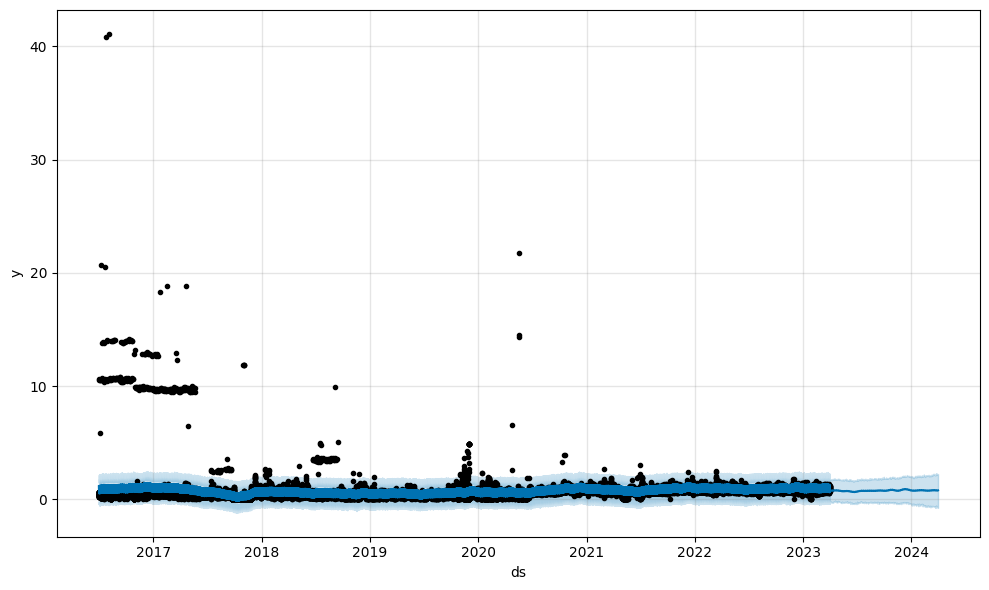

In [177]:
fig1 = model.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

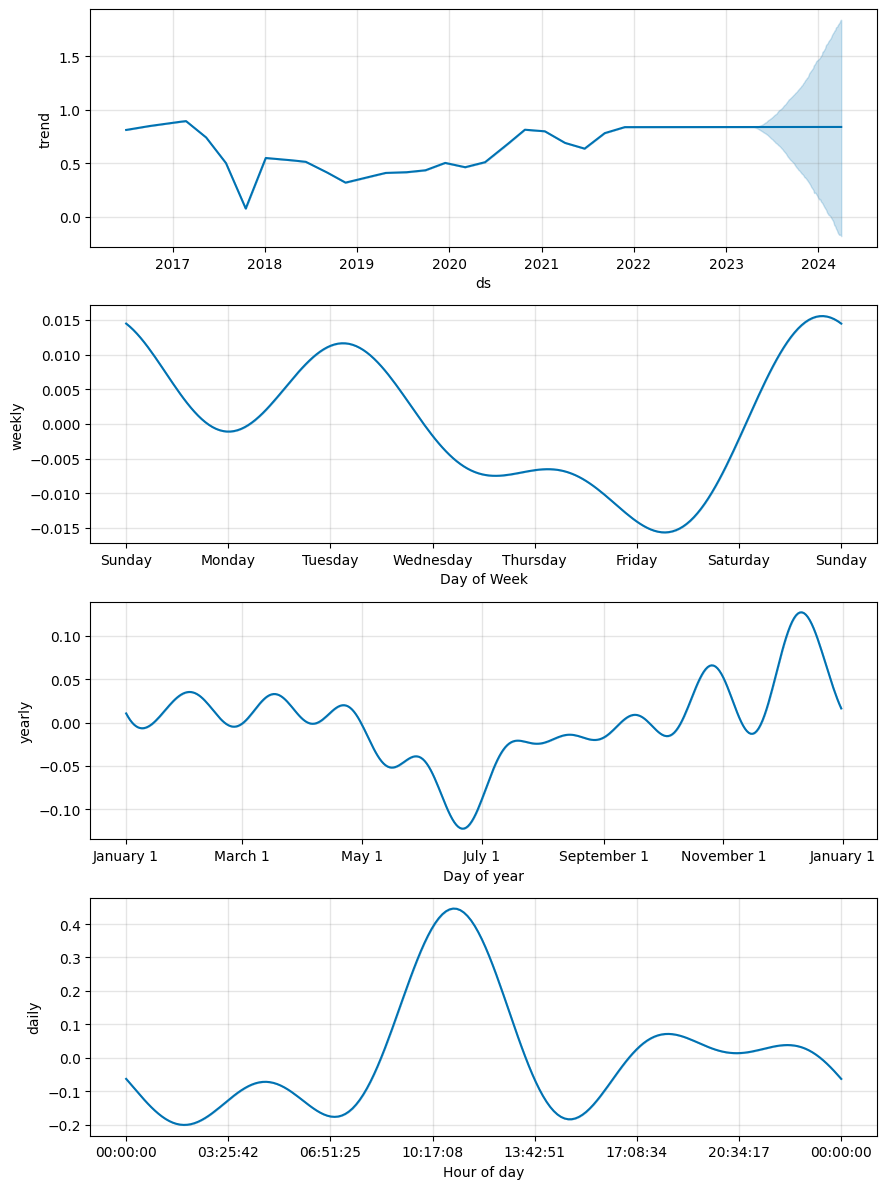

In [178]:
fig2 = model.plot_components(forecast)

In [179]:
data['y']=air_quality_data['SO2 (ug/m3)']

In [180]:
data.tail()

,ds,ds2,y
59145,2023-03-31 20:00:00,2023-03-31 19:00:00,3.68
59146,2023-03-31 21:00:00,2023-03-31 20:00:00,3.02
59147,2023-03-31 22:00:00,2023-03-31 21:00:00,1.62
59148,2023-03-31 23:00:00,2023-03-31 22:00:00,1.82
59149,2023-04-01 00:00:00,2023-03-31 23:00:00,1.83


In [181]:
model=p()

In [182]:
model.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_vqmms2x/6g9ahqj1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_vqmms2x/v13gb8o3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96039', 'data', 'file=/tmp/tmp_vqmms2x/6g9ahqj1.json', 'init=/tmp/tmp_vqmms2x/v13gb8o3.json', 'output', 'file=/tmp/tmp_vqmms2x/prophet_modelqabdyv7w/prophet_model-20240805192925.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:29:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:30:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [183]:
future=model.make_future_dataframe(periods=365,freq='D')

In [184]:
future.tail()

,ds
59510,2024-03-27
59511,2024-03-28
59512,2024-03-29
59513,2024-03-30
59514,2024-03-31


In [185]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
59510,2024-03-27,8.785621,-1.643534,19.158976
59511,2024-03-28,8.581912,-3.064377,19.391927
59512,2024-03-29,8.549804,-2.884496,19.235130
59513,2024-03-30,8.652445,-1.856281,19.754983
59514,2024-03-31,8.670716,-2.348014,19.554663


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


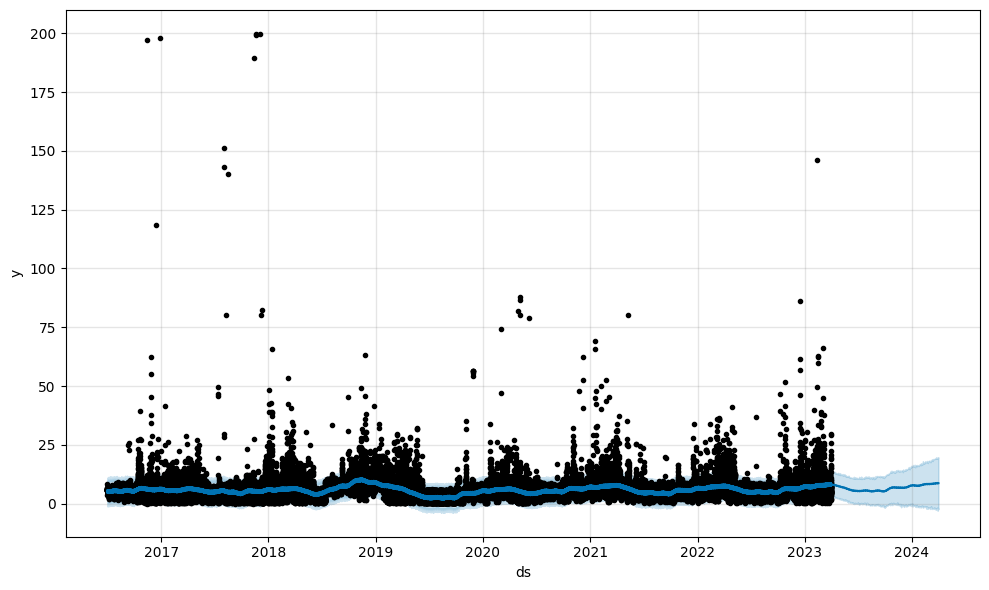

In [186]:
fig1 = model.plot(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

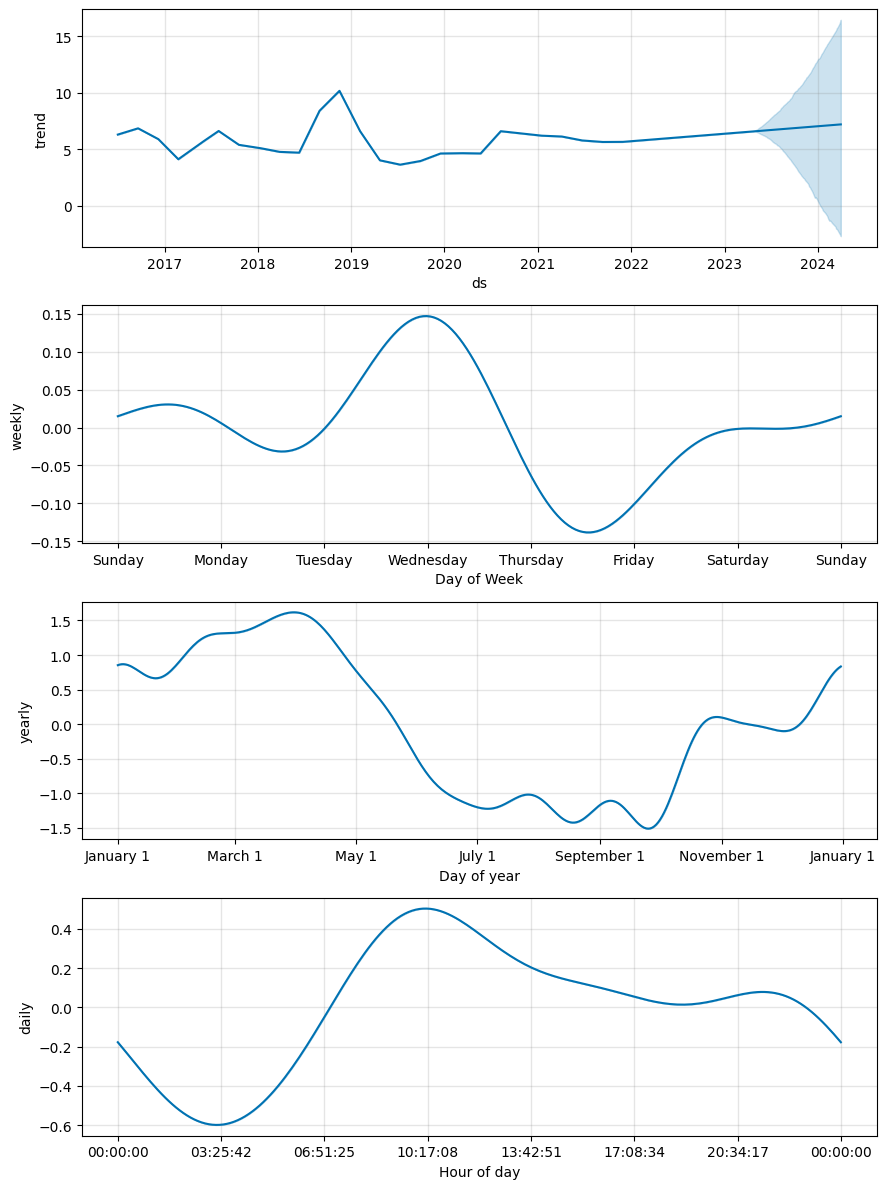

In [187]:
fig2 = model.plot_components(forecast)